# Synthetic dataset

This notebook generates a synthetic dataset that is based on the following conceptual framework: 
- Log interval from 500 - 1000 mMD in a vertical well. 
- Two lithologies: 500 - 750 and 750 - 1000 mMD. 
- Two fault zones with associated increased fracture frequency, centered at 600 and 900 mMD.

A CSV file is generated that replicates an output from BHI analysis done with log analysis software.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplstereonet as mps

from utilities import *
from fractoolbox import strike2dipaz

In [2]:
strike_cluster1 = random_strikes(100, 90, 10) # n, mean, std_dev
dip_cluster1 = random_dips(100, 65, 10)
depth_cluster1 = random_depths_normal(100, 600, 80, 500, 1000) # n, mean, std_dev, lower_bound, upper_bound
aperture_cluster1 = random_aperture_lognormal(2.5, 3, 0.01, 20, 100)  #(0.02, 3, 0.01, 20, 100) 
attribute_cluster1 = 100 * ['Conductive, HC']

strike_cluster2 = random_strikes(100, 280, 10)
dip_cluster2 = random_dips(100, 65, 10)
depth_cluster2 = random_depths_normal(100, 900, 50, 500, 1000)
aperture_cluster2 = random_aperture_lognormal(0.1, 3, 0.01, 10, 100)
attribute_cluster2 = 100 * ['Conductive, HC']

strike_background = np.random.randint(0, 360, 50)
dip_background = np.random.randint(0, 90, 50)
depth_background = random_depths_normal(50, 750, 250, 500, 1000)
aperture_background = random_aperture_lognormal(0.02, 5, 0.01, 5, 50)
attribute_background = 50 * ['Conductive, LC']

strike_bedding1 = random_strikes(100, 170, 15)
dip_bedding1 = random_dips(100, 15, 5)
depth_bedding1 = random_depths_uniform(100, 500, 750)
aperture_bedding1 = 100 * [0]
attribute_bedding1 = 100 * ['Bed boundary']

strike_bedding2 = random_strikes(100, 220, 30)
dip_bedding2 = random_dips(100, 20, 15)
depth_bedding2 = random_depths_uniform(100, 750, 1000)
aperture_bedding2 = 100 * [0]
attribute_bedding2 = 100 * ['Bed boundary']



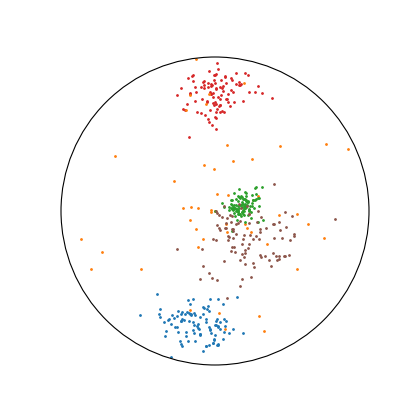

In [3]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='stereonet')

ax.pole(strike_cluster1, dip_cluster1, marker = 'o', color = 'tab:red', markersize=1)
ax.pole(strike_cluster2, dip_cluster2, marker = 'o', color = 'tab:blue', markersize=1)
ax.pole(strike_background, dip_background, marker = 'o', color = 'tab:orange', markersize=1)
ax.pole(strike_bedding1, dip_bedding1, marker = 'o', color = 'tab:green', markersize=1)
ax.pole(strike_bedding2, dip_bedding2, marker = 'o', color = 'tab:brown', markersize=1)

ax.set_azimuth_ticks([])
plt.show()

Text(0, 0.5, 'Frequency')

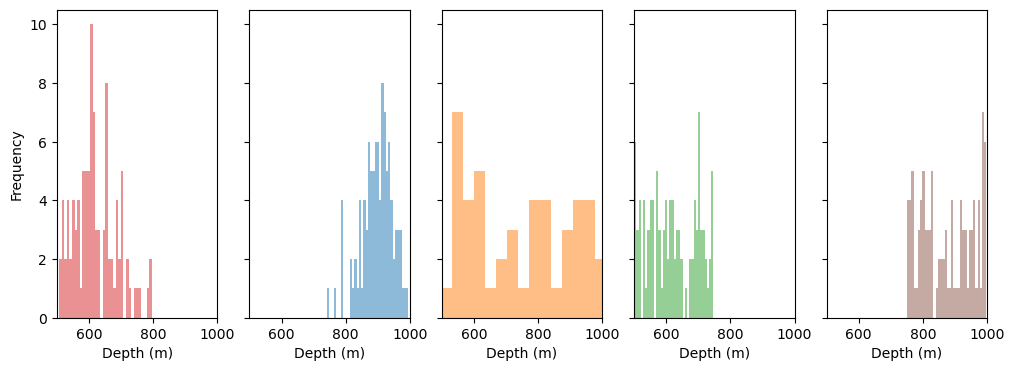

In [4]:
# make a set of five histograms using plt.subplots and defining explicitly the axes

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 4), sharey=True)

axes[0].hist(depth_cluster1, bins=36, color = 'tab:red', alpha = 0.5)
axes[1].hist(depth_cluster2, bins=36, color = 'tab:blue', alpha = 0.5)
axes[2].hist(depth_background, bins=36, color = 'tab:orange', alpha = 0.5)
axes[3].hist(depth_bedding1, bins=36, color = 'tab:green', alpha = 0.5)
axes[4].hist(depth_bedding2, bins=36, color = 'tab:brown', alpha = 0.5)

for ax in axes:
    ax.set_xlabel('Depth (m)')
    ax.set_xlim(500, 1000)

axes[0].set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

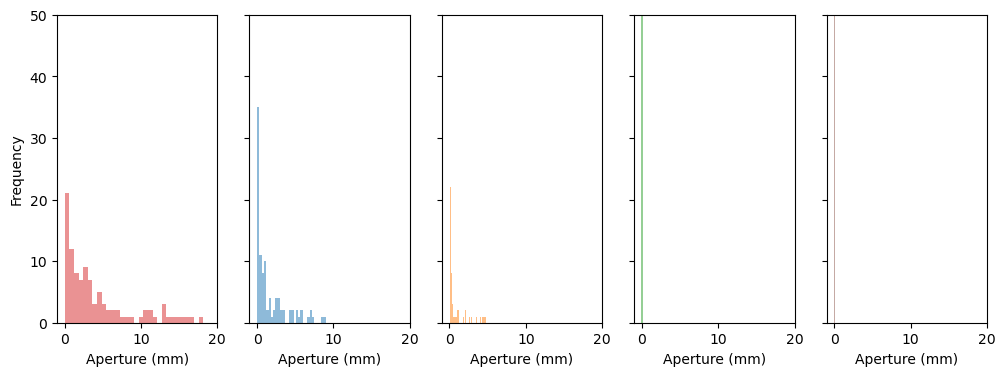

In [5]:
# make a set of five histograms using plt.subplots and defining explicitly the axes

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 4), sharey=True)

axes[0].hist(aperture_cluster1, bins=30, color = 'tab:red', alpha = 0.5)
axes[1].hist(aperture_cluster2, bins=30, color = 'tab:blue', alpha = 0.5)
axes[2].hist(aperture_background, bins=30, color = 'tab:orange', alpha = 0.5)
axes[3].hist(aperture_bedding1, bins=5, color = 'tab:green', alpha = 0.5)
axes[4].hist(aperture_bedding2, bins=5, color = 'tab:brown', alpha = 0.5)

for ax in axes:
    ax.set_xlabel('Aperture (mm)')
    ax.set_xlim(-1, 20)
    ax.set_ylim(0,50)

axes[0].set_ylabel('Frequency')

In [6]:
# concatenate lists

strike = np.concatenate((strike_cluster1, strike_cluster2, strike_background, strike_bedding1, strike_bedding2), axis=None)
dip = np.concatenate((dip_cluster1, dip_cluster2, dip_background, dip_bedding1, dip_bedding2), axis=None)
depth = np.concatenate((depth_cluster1, depth_cluster2, depth_background, depth_bedding1, depth_bedding2), axis=None)
aperture = np.concatenate((aperture_cluster1, aperture_cluster2, aperture_background, aperture_bedding1, aperture_bedding2), axis=None)
attribute = np.concatenate((attribute_cluster1, attribute_cluster2, attribute_background, attribute_bedding1, attribute_bedding2), axis=None)

# convert to dataframe

df = pd.DataFrame({'strike': strike, 'dip': dip, 'depth_m': depth, 'aperture_mm': aperture, 'type': attribute})


In [7]:
df.describe()

,strike,dip,depth_m,aperture_mm
count,450.000000,450.000000,450.000000,450.000000
mean,188.856626,42.696792,752.122350,1.395988
std,75.794837,24.645009,157.483882,2.913713
min,5.000000,0.000000,157.653506,0.000000
25%,108.798179,17.358540,610.541891,0.000000
50%,186.981233,44.734488,752.270637,0.049566
75%,265.714827,65.568442,895.314876,1.289191
max,348.000000,89.000000,1386.520969,18.159196


In [8]:
# calculate dip azimuths

dipazs = []

for strike in df.strike.values:
    dipazs.append(strike2dipaz(strike))

df['dip_az'] = dipazs

In [9]:
# subselect a dataframe for export

export_df = df[['depth_m','dip_az','dip', 'aperture_mm', 'type']].copy()
export_df = export_df[(export_df.depth_m > 500) & (export_df.depth_m < 1000)]

In [10]:
export_df.describe()

,depth_m,dip_az,dip,aperture_mm
count,446.000000,446.000000,446.000000,446.000000
mean,752.315736,201.734263,42.568513,1.395895
std,150.197112,111.337939,24.712021,2.920963
min,500.034701,0.013227,0.000000,0.000000
25%,611.794292,168.171203,17.283704,0.000000
50%,752.270637,239.087762,44.379844,0.049566
75%,895.062074,284.395986,65.568442,1.289191
max,998.242393,359.885757,89.000000,18.159196


In [11]:
export_df.to_csv('0_Synthetic_data.csv', index=False)